# lab12-6: RNN with Time Series Data

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


In [ ]:
tf.set_random_seed(777)  # reproducibility

In [ ]:
def MinMaxScaler(data):
    ''' Min Max Normalization

    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [ ]:
# train Parameters
seq_length = 7 # timesteps
data_dim = 5
output_dim = 1

hidden_dim = 10
learning_rate = 0.01
iterations = 1000

In [ ]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

In [ ]:
xy=MinMaxScaler(xy)
x = xy
y = xy[:, [-1]] # close as label

In [ ]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length, :]
    _y = y[i + seq_length, [-1]]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]] -> [0.12316526]
[[0.11044525 0.12724798 0.11435324 0.35107108 0.11089532]
 [0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]] -> [0.10022843]
[[0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]
 [0.11405885 0.10952968 0.11353161 0.18323922 0.10022843]] -

In [ ]:
# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataX)])

In [ ]:
# input placeholders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
# build a LSTM network( + FC layer)
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True) #, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)  
# We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares, linear loss
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `layer.__call__` method instead.


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# Training step
for i in range(iterations):
  _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
  print("[step: {}] loss: {}".format(i, step_loss))
# Test step
test_predict = sess.run(Y_pred, feed_dict={X: testX})

[step: 0] loss: 120.23834228515625
[step: 1] loss: 73.46891021728516
[step: 2] loss: 39.228477478027344
[step: 3] loss: 17.684755325317383
[step: 4] loss: 9.289350509643555
[step: 5] loss: 12.563089370727539
[step: 6] loss: 20.068117141723633
[step: 7] loss: 23.234128952026367
[step: 8] loss: 20.652263641357422
[step: 9] loss: 15.16076374053955
[step: 10] loss: 9.661201477050781
[step: 11] loss: 5.7908406257629395
[step: 12] loss: 3.950040340423584
[step: 13] loss: 3.754762649536133
[step: 14] loss: 4.508398532867432
[step: 15] loss: 5.5278215408325195
[step: 16] loss: 6.30570650100708
[step: 17] loss: 6.5569376945495605
[step: 18] loss: 6.202534198760986
[step: 19] loss: 5.327601432800293
[step: 20] loss: 4.131348609924316
[step: 21] loss: 2.874297618865967
[step: 22] loss: 1.8216485977172852
[step: 23] loss: 1.1820602416992188
[step: 24] loss: 1.0481585264205933
[step: 25] loss: 1.3576682806015015
[step: 26] loss: 1.9035123586654663
[step: 27] loss: 2.41013765335083
[step: 28] loss: 

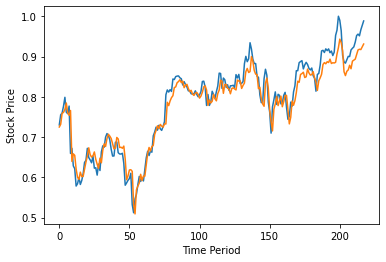

In [ ]:
# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

## 몇가지 수정된 버전
- train과 test 스케일링을 따로 시행
  - 결과에 유효한 영향을 미침
- test set의 index가 **train_size - seq_length** 부터
  - 인덱싱을 **train_size**부터 끝까지 해도 눈에 띄는 차이는 없음

In [ ]:
tf.reset_default_graph()

In [ ]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size- seq_length:]  # Index from [train_size - seq_length] to utilize past sequence <-> xy[train_size:]

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]] -> [0.14877846]
[[0.13075879 0.14979736 0.13950917 0.35107108 0.1339569 ]
 [0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]] -> [0.12107173]
[[0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]] -

In [ ]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [ ]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 83.02510833740234
[step: 1] loss: 41.45264434814453
[step: 2] loss: 16.41095733642578
[step: 3] loss: 6.2597150802612305
[step: 4] loss: 7.519529342651367
[step: 5] loss: 13.606281280517578
[step: 6] loss: 17.78765106201172
[step: 7] loss: 17.669002532958984
[step: 8] loss: 14.374731063842773
[step: 9] loss: 9.9182767868042
[step: 10] loss: 5.910881519317627
[step: 11] loss: 3.237513303756714
[step: 12] loss: 2.1105151176452637
[step: 13] loss: 2.2579479217529297
[step: 14] loss: 3.153989791870117
[step: 15] loss: 4.234836578369141
[step: 16] loss: 5.0550103187561035
[step: 17] loss: 5.363013744354248
[step: 18] loss: 5.106258392333984
[step: 19] loss: 4.39146089553833
[step: 20] loss: 3.4247536659240723
[step: 21] loss: 2.4468472003936768
[step: 22] loss: 1.6722620725631714
[step: 23] loss: 1.239948034286499
[step: 24] loss: 1.1836142539978027
[step: 25] loss: 1.4300600290298462
[step: 26] loss: 1.8289488554000854
[step: 27] loss: 2.206700086593628
[step: 28] loss: 2.4

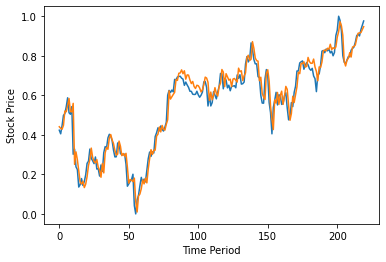

In [ ]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()